# Lab 6b: Binomial Lattice Models of Equity Share Price
A binomial lattice model assumes that each discrete time increment, the state of the system, e.g., the share price of equity, the short rate, etc., can either increase by a factor $u$ with probability $p$ or decrease by a factor $d$ with probability $(1-p)$ in the next time interval. Thus, each discrete time interval can be modeled as a [Bernoulli random variable](https://en.wikipedia.org/wiki/Bernoulli_distribution):

<div>
    <center>
        <img src="figs/Fig-Binomial-Lattice-Schematic.png" width="280"/>
    </center>
</div>

Different models have been developed to compute the tuple $(u,d,p)$. However, for now, let's analyze historical data and learn typical values governing the price movement for each firm in our historical dataset.  

## Learning Objectives
The objective of `L6b` is to familiarize students with the application of simple probability mass functions to predict future uncertain quantities such as commodity prices, equity share prices, interest rates, etc. In particular, in `L6b`, we will:

* __Objective 1__: Estimate typical values for the tuple $(u,d,p)$ using historical data for the share price of different firms (real-world probanbility measure).  
* __Objective 2__: Compare bionomial lattice model simulations of share price versus historical data

## Tasks
Fill me in

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions that we will use in the exercise, and custom types to model the components of our example problem.

### Packages
The `Include.jl` file loads several packages that we use'll for our exercises:
* [Dates.jl](https://docs.julialang.org/en/v1/stdlib/Dates/#Dates)  is a package included with the standard library which provides basic functionality for working dates.
* [DataFrames.jl](https://dataframes.juliadata.org/stable/) and [CSV.jl](https://github.com/JuliaData/CSV.jl) provide a set of tools for working with tabular data in [Julia](https://julialang.org). Its design and functionality are similar to those of [Pandas (in Python)](https://pandas.pydata.org) and [data.frame, data.table and dplyr (in R)](https://dplyr.tidyverse.org), making it an excellent general-purpose data science tool.
* [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) is a [Julia](https://julialang.org) package for probability distributions and associated functions.
* [PrettyTables.jl](https://ronisbr.github.io/PrettyTables.jl/stable/man/html_backend/) is a [Julia](https://julialang.org) package that implements functions to construct and display text-based tables
* [Plots.jl](https://docs.juliaplots.org/stable/) is a plotting library, and [Colors.jl](https://github.com/JuliaGraphics/Colors.jl) is a color library that we'll use for data visualization in [Julia](https://julialang.org).
* [LinearAlgebra.jl](https://github.com/JuliaLang/LinearAlgebra.jl) is a package that provides functionality for working with linear algebra in [Julia](https://julialang.org).
* [Statistics.jl](https://docs.julialang.org/en/v1/stdlib/Statistics/#Statistics) is a package included with the standard library module, which contains basic statistics functionality.

### Types
`Include.jl` loads some [problem-specific types](https://docs.julialang.org/en/v1/manual/types/#Composite-Types) that will be helpful for the lattice model simulation of equity share prices:

The `MyBinomialEquityPriceTree` encodes the lattice model and has the fields:
    
* The `connectivity::Union{Nothing, Dict{Int64, Array{Int64,1}}}` field holds the indexes of the children for each parent node of the tree.
* The `levels::Union{Nothing, Dict{Int64,Array{Int64,1}}}` field holds indexes of nodes that belong to each level of the tree, i.e., a particular trading day.
* The `u::Float64` field holds the value of the `up` factor
* The `d::Float64` field holds the value of the `down` factor
* The `p::Float64` field holds the value of the probability of an `up` move.
* The `data::Union{Nothing, Dict{Int64, MyBiomialLatticeEquityNodeModel}}` holds each node in the tree; nodes are of type `MyBiomialLatticeEquityNodeModel`

Each node in the tree is a `MyBiomialLatticeEquityNodeModel` type. The `MyBiomialLatticeEquityNodeModel` has two important fields:
* The `price::Float64` field holds the price value for a node
* The `probability::Float64` field holds the probability value associated with this node

### Functions
`Include.jl` loads the following [Julia functions](https://docs.julialang.org/en/v1/manual/functions/):

`function loaddatafile(; firm::Int = 1, year::String = "Year-1") -> DataFrame` 
 > This function, which loads hostorical share price data, takes an [Int](https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/#Integers) that encodes a `firm index` and a [String](https://docs.julialang.org/en/v1/manual/strings/) arguement that holds the `year` parameter of the dataset. The historical share price data is returned to the caller as a [DataFrame](https://dataframes.juliadata.org/stable/) with the fields: `volume`,`volume_weighted_average_price`,`open`,`close`,`high`, and `low,number_of_transactions`.
 
`function analyze(R::Array{Float64,1};  Δt::Float64 = (1.0/365.0)) -> Tuple{Float64,Float64,Float64}`
> The `analyze(...)` function takes an array of return values in the `R` argument and a value of the time-step size of the simulation in the $\Delta{t}$ parameter (default value of 1-day) and returns estimated values for the lattice model parameters $(u,d,p)$.  
 
`function build(model::Type{MyBinomialEquityPriceTree}, data::NamedTuple) -> MyBinomialEquityPriceTree` 
> This function takes information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument (the $(u,d,p)$ values) and returns an instance of the `MyBinomialEquityPriceTree` [mutable type](https://docs.julialang.org/en/v1/manual/types/#Mutable-Composite-Types). Note: the `MyBinomialEquityPriceTree` returned from the `build(...)` function does not have price or probability information computed yet. To populate this data, call the `populate(...)` function.

`function populate(model::MyBinomialEquityPriceTree, Sₒ::Float64, h::Int) -> MyBinomialEquityPriceTree`
> The `populate(...)` function takes the `model::MyBinomialEquityPriceTree` instance returned from `build(...)`, a starting share price $S_{o}$ and the height of the tree, i.e., the number of time steps to simulate, and returns an updated `model::MyBinomialEquityPriceTree` instance with the price and probabilities computed for each node in the tree.

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-5660-Labs-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Labs-F23/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-5660-Labs-F23`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Labs-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Labs-F23/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Labs-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Labs-F23/Manifest.toml`


#### Constants

In [2]:
max_number_of_records = 1256;
Δt = (1/252);
TSIM = 21;

## Task 1: Test lattice model using example from Hull
Let’s start by calculating the hypothetical share price from an example (reproduced from Chapter 13 of Hull) before diving into historical data analysis. The lattice in this example has three levels (`L=0,1,2`), with an initial share price of $S_{\circ}=20.0$ USD. An `up` move has a probability of `p = 0.6523` and a magnitude of `u = 1.1`, while a `down` move has a magnitude of  `d = 0.9`.

### Implementation
Calculating the future share price with a binomial lattice requires setting the model’s parameters, including the initial share price (as a `Float64`), the number of time steps to simulate into the future, which equals the number levels of the tree starting from zero (as an `Int64`), the up and down move magnitudes (as `Float64` values), and the probability of an up move (as a `Float64`):

In [3]:
Sₒ,T,u,d,p = 20.0,2,1.1,0.9,0.6523;

Once these values are set, we use the `build(…)` function to create an empty lattice model of type `MyBinomialEquityPriceTree`, which is then passed to the `populate(…)` function using the [Julia piping operator](https://docs.julialang.org/en/v1/manual/functions/#Function-composition-and-piping) `|>`. The `populate(…)` function calculates the prices and probabilities of each node (type `MyBiomialLatticeEquityNodeModel`) in the tree:

In [4]:
test_model = build(MyBinomialEquityPriceTree, (
        u = u, d = d, p = p)) |> (x-> populate(x, Sₒ = Sₒ, h = T));

Finally, we compare the price values we calculated to those reported by Hull. First, we populate the `hull_price_dictionary` dictionary with the price values at each node in the tree:

In [5]:
hull_price_dictionary = Dict(0=>20.0, 1=>22.0,2=>18.0,3=>24.2,4=>19.8,5=>16.2);

Next, we compare the `Hull` values to those we just calculated. We populate the `hull_test_data_table`, which is of type `DataFrame`, using a `for` loop:

In [6]:
number_of_nodes = length(test_model.data);
hull_test_data_table = DataFrame();
for i ∈ 0:(number_of_nodes-1)
    
    row_data = (
        index = i,
        hull_price = hull_price_dictionary[i],
        our_price = test_model.data[i].price, 
        isapproxequal = isapprox(hull_price_dictionary[i], test_model.data[i].price, rtol=1e-4)
    );
    
    push!(hull_test_data_table, row_data)
end

In [7]:
hull_test_data_table

Row,index,hull_price,our_price,isapproxequal
,Int64,Float64,Float64,Bool
1,0,20.0,20.0,true
2,1,22.0,22.0,true
3,2,18.0,18.0,true
4,3,24.2,24.2,true
5,4,19.8,19.8,true
6,5,16.2,16.2,true


Q1.1 (Conceptual): Can you visualize this lattice? What would be the total number of nodes if this were extended another level?

## Task 2: Load historical equity dataset, select a random f
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) for the past five-trading years (a maximum of `1256` data points per firm). However, not all the firms in the `dataset` have the maximum number of trading days, i.e., some firms are missing information for various reasons; perhaps they were acquired, merged, or delisted, etc. We will exclude these firms from the `dataset`. We load the price `dataset` by calling the `MyPortfolioDataSet()` function:

In [8]:
dataset = MyPortfolioDataSet() |> x-> x["dataset"];

The all keys array holds the list of firm indexes in the dataset that have complete data, i.e., all `1256` data values: 

In [9]:
list_of_all_firms = keys(dataset) |> collect |> sort;

Let's select a random firm with `firm_index` to explore in this study by calling the `rand` function of the keys of the `dataset` dictionary, and then pull the histiorical data out of `dataset` that associated with this firm and store it in the variable `firm_data`:

In [10]:
random_firm_index = list_of_all_firms |> rand;

However, while it is sometimes convenient to work with the data using the `random_firm_index`, often we specify the [ticker symbol](https://en.wikipedia.org/wiki/Ticker_symbol#:~:text=A%20ticker%20symbol%20or%20stock,on%20a%20particular%20stock%20market.) instead. To facilitate this, let's load a mapping between the `random_firm_index` and the ticker symbols using the `MyFirmMappingDataSet()` function. We store this mapping in the `firm_mapping_df` variable, which is of type `DataFrame`:

In [11]:
firm_mapping_df = MyFirmMappingDataSet()

Row,Symbol,Name,Sector
,String7,String,String31
1,MMM,3M,Industrials
2,AOS,A. O. Smith,Industrials
3,ABT,Abbott Laboratories,Health Care
4,ABBV,AbbVie,Health Care
5,ABMD,Abiomed,Health Care
6,ACN,Accenture,Information Technology
7,ATVI,Activision Blizzard,Communication Services
8,ADM,ADM,Consumer Staples
9,ADBE,Adobe,Information Technology


In [12]:
random_firm_data = dataset[random_firm_index]

Row,volume,volume_weighted_average_price,open,close,high,low,number_of_transactions
,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,1.95746e6,305.303,294.0,309.0,313.2,293.26,22009
2,706703.0,306.853,309.03,307.11,310.38,304.39,9267
3,998385.0,311.216,310.24,313.79,314.28,307.59,11313
4,1.08772e6,317.446,314.1,318.47,320.1,312.33,11948
5,681955.0,319.589,319.67,319.37,322.18,318.135,8188
6,1.15482e6,324.026,318.94,321.8,328.248,318.0,13719
7,813772.0,325.669,322.61,325.5,328.19,320.5,10838
8,675910.0,326.265,326.84,327.34,328.62,323.07,8859
9,706558.0,327.816,329.33,327.37,330.94,324.9,7577


In [13]:
println("The (randomly) selected firm has index: $(random_firm_index) and ticker $(firm_mapping_df[random_firm_index,:Symbol])")

The (randomly) selected firm has index: 106 and ticker CMG


Q2.1 (Data Manipulation): What is the full name and sector of this randomly selected firm? (Use `firm_mapping_df`)

In [ ]:
# FILL ME IN

## Task 3: Estimate the up, down and probability of an up move from random firm data
After validating our lattice implementation, it's time to utilize historical data to compute a share price prediction. To create a binomial lattice model for future share prices, we need to estimate three critical parameters: $p$, $u$, and $d$.

* The $p$ parameter represents the probability of a share price increase or an `up` move between two periods $j\rightarrow{j+1}$. As a binary lattice model only allows `up` and `down` moves, the probability of a `down` move is $1-p$.
* The $u$ parameter represents the amount of an `up` move. If $S_{j}$ stands for the share price in period $j$, and $S_{j+1}$ is the share price in the next period, then an `up` move will give $S_{j+1} = u\cdot{S}_{j}$.
* The $d$ parameter represents the amount of a `down` move. If $S_{j}$ stands for the share price in period $j$, and $S_{j+1}$ is the share price in the next period, then a `down` move will give $S_{j+1} = d\cdot{S}_{j}$.

### Task 3a: Estimate the `u`, `d` and probability `p` parameters from data
Now that we have loaded the data, we can calculate the number of `up` and `down` moves, and the magnitude of these moves occuring in the dataset. To do this, we assume a share price model of the form:

$$
S_{j} = \exp\left(\mu_{j,j-1}\Delta{t}\right)\cdot{S_{j-1}}
$$

where $\mu_{j,j-1}$ denotes the _growth rate_ (units: 1/time) and $\Delta{t}$ (units: time) denotes the time step during the time period $(j-1)\rightarrow{j}$. Solving for the return parameter $\mu_{j,j-1}$ gives the expression:

$$
\mu_{j,j-1} = \left(\frac{1}{\Delta{t}}\right)\cdot\ln\left(\frac{S_{j}}{S_{j-1}}\right)
$$

We use daily data; thus, the natural time frame between $S_{j-1}$ and $S_{j}$ is a single day. However, subsequently, it will be easier to use an annualized value for the $\mu$ parameter; thus, we let $\Delta{t} = 1/252$, i.e., the fraction of a year that occurs in a single day.

#### Implementation
We initialize an `max_number_of_records` $\times$ `1` array that holds the values for $\mu_{j,j-1}$, named `log_growth_array`. We then populate the `log_growth_array` using a `for` loop; 
* During each pass through the loop, we get values for price $S_{j-1}$ and $S_{j}$, i.e., the VWAP for the two days from the dataset `random_firm_data`, and compute (and store) the annualized value of $\mu_{j,j-1}$ growth parameter in the `log_growth_array`:

In [14]:
log_growth_array = Array{Float64,1}(undef, max_number_of_records - 1)
for j ∈ 2:max_number_of_records
    
    S₁ = random_firm_data[j-1,:volume_weighted_average_price];
    S₂ = random_firm_data[j, :volume_weighted_average_price];
    log_growth_array[j-1] = # FILL ME IN;
end
log_growth_array;

Using the `log_growth_array`, we compute the expected magnitide of an `up` move `ū`, the expected magnitide of a `down` move `d̄` , and the estimated probability `p̄` of an `up` move by calling the `analyze(...)` function (this computes the `ū` and `d̄` for the `log return`):

In [15]:
(ū,d̄,p̄) = analyze(log_growth_array, Δt = Δt);

Q3.1 (Conceptual): How are these parameters computed? (Looking in the `src/Compute.jl` file may help)

### Task 3b: Build binomial lattice model using historical $(u,d,p)$ parameters
Let's construct an instance of the `MyBinomialEquityPriceTree` type using the estimated values for `(u,d,p)`. This enables us to calculate the prices and probabilities in the tree. We store the populated model in the variable `model` for future use.

Firstly, we need to set a value for the `T` variable, specifying the number of future days to simulate. Time steps are represented in the tree as levels `L = 0,1,..., T`, where each level represents $\Delta{t}$ units of time, which is a trading day. We then specify the `start_index` as the trading day index in the combined dataset `df`, which will serve as the tree’s starting point or `L=0`. Finally, we can set the variable `Sₒ`, which corresponds to the initial price per share at the root of the tree; we use the [volume-weighted average price (VWAP)](https://en.wikipedia.org/wiki/Volume-weighted_average_price) as the initial condition:

In [16]:
start_index = rand(1:(max_number_of_records - TSIM - 1))
stop_index = start_index + TSIM
println("Visualize Firm-$(random_firm_index) between trading days ($(start_index) -> $(stop_index))")

Visualize Firm-106 between trading days (1221 -> 1242)


In [17]:
Sₒ = random_firm_data[start_index,:volume_weighted_average_price];
model = build(MyBinomialEquityPriceTree, (
    u = ū, d = d̄, p = p̄)) |> (x-> populate(x, Sₒ = Sₒ, h = TSIM));
println("Starting simulation from Sₒ = $(Sₒ) USD/share")

Starting simulation from Sₒ = 1375.3326 USD/share


### Task 3c: Visualize binomial lattice simulation

In [18]:
levels = [k for k ∈ 0:(TSIM-1)]
expectation = 𝔼(model, levels; startindex = start_index);
variance = Var(model, levels; startindex = start_index);

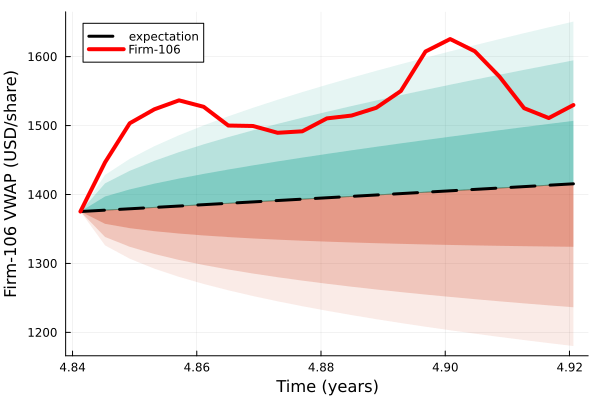

In [19]:
L68 = expectation[:,2] .- sqrt.(variance[:,2])
U68 = expectation[:,2] .+ sqrt.(variance[:,2])
L95 = expectation[:,2] .- 1.96*sqrt.(variance[:,2])
U95 = expectation[:,2] .+ 1.96*sqrt.(variance[:,2])
L99 = expectation[:,2] .- 2.576*sqrt.(variance[:,2])
U99 = expectation[:,2] .+ 2.576*sqrt.(variance[:,2])

T_range = range(start_index,stop=stop_index-1,step=1) |> collect 
T_sim = T_range*Δt .- Δt

plot(T_sim, expectation[:,2], fillrange=L68, c=colors[5], alpha=0.3, label="")
plot!(T_sim, expectation[:,2], fillrange=U68, c=colors[6], alpha=0.3, label="")
plot!(T_sim, expectation[:,2], fillrange=L95, c=colors[5], alpha=0.2, label="")
plot!(T_sim, expectation[:,2], fillrange=U95, c=colors[6], alpha=0.2, label="")
plot!(T_sim, expectation[:,2], fillrange=L99, c=colors[5], alpha=0.1, label="")
plot!(T_sim, expectation[:,2], fillrange=U99, c=colors[6], alpha=0.1, label="")
plot!(T_sim, expectation[:,2],c=:black, lw=3,ls=:dash, label="expectation")
plot!(T_sim, random_firm_data[levels .+ start_index, :volume_weighted_average_price],  
    lw=4, c=:red, label="Firm-$(random_firm_index)", legend = :topleft)

xlabel!("Time (years)", fontsize=18)
ylabel!("Firm-$(random_firm_index) VWAP (USD/share)", fontsize=18)

The black dashed line is the expected share price predicted by the lattice model, while the shaded regions denote $\mu\pm{z}\cdot\sigma$ for $z=1.0,1.96,2.576$. The solid red line is the [observed VWAP price](https://en.wikipedia.org/wiki/Volume-weighted_average_price) for this firm, and date range.

### Was this a successful simulation?
Determining if a model accurately represents data can be done in various ways, but we will utilize a straightforward functional test. This test involves checking if the simulated price falls within a specified lower bound ($L_{j}$) and upper bound ($U_{j}$) for all times $t_j$ within a given interval ($t_{j}\in\mathcal{I}_{k}$). 

* If the simulation meets this requirement, it is deemed a `success`. The values for $L_{j}$ and $U_{j}$ can be customized, but we set these to $\mu\pm{2.576}\cdot{\sigma}$, where $\mu$ represents the expected value and $\sigma$ is the standard deviation of the geometric Brownian motion simulation. 
* However, if the actual price exceeds the given bounds at any point, the simulation is considered a `failure`.

In [20]:
L = L99
U = U99
   
# check the bounds: if below L, or above U then simulation failed
success_flag = true;
for k ∈ 1:T
    if (random_firm_data[start_index+k-1,:volume_weighted_average_price] < L[k]) || (random_firm_data[start_index+k-1,:volume_weighted_average_price] > U[k])
        success_flag = false;
        break;
    end
end

println("The simultion of the VWAP of Firm-$(random_firm_index) between ($(start_index) -> $(stop_index)) was successful: $(success_flag)")

The simultion of the VWAP of Firm-106 between (1221 -> 1242) was successful: false


Q3.3: Find an example of a firm and time period that results in a successful simulation. Why do you think this simulation was successful?